In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'aapl' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996,-0.025676,0.039368,0.012395,0.024494,0.010610,1
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005,-0.002052,0.036714,0.028465,0.016328,0.006285,-1
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007,0.009080,0.012617,-0.006976,0.017229,0.004999,1
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001,-0.004950,0.018002,0.007712,0.017253,0.005149,1
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002,-0.020151,0.028687,0.035766,0.016987,0.015472,-1
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995,0.023035,0.033125,-0.013315,0.021455,0.010330,1
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001,0.013719,0.019415,-0.008527,0.019965,0.002932,1
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002,0.010367,0.022927,-0.007703,0.020057,0.002787,-1
2021-01-04,133.610001,126.760002,133.520004,129.410004,143129000.0,129.410004,0.030782,0.054039,-0.024719,0.023082,-0.003700,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

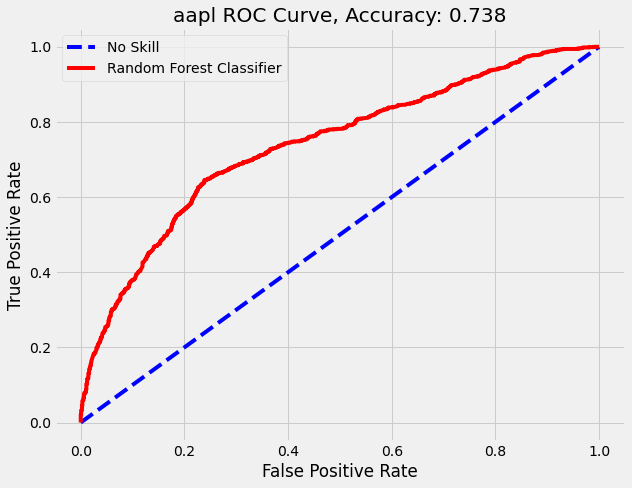

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

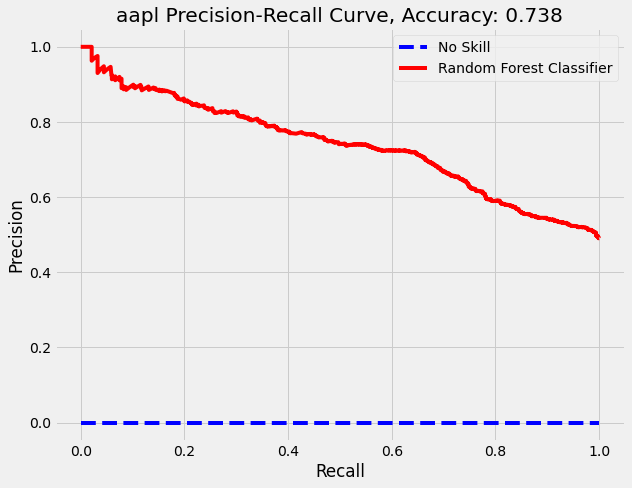

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

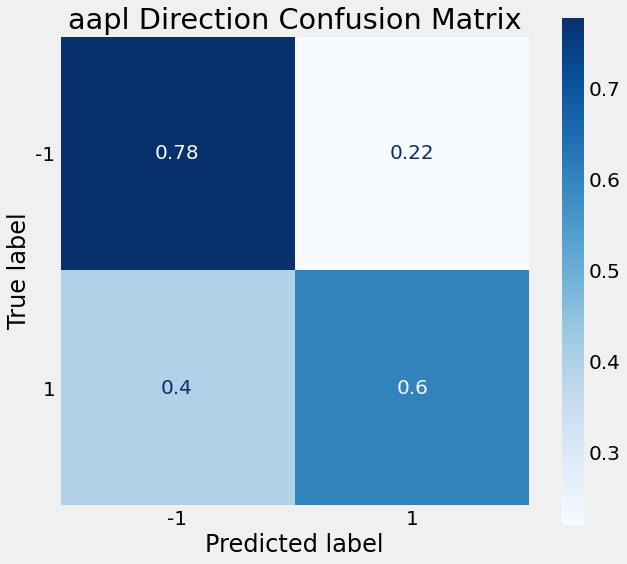

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7082999132008299'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          1.317400e+02
Low           1.284300e+02
Open          1.288900e+02
Close         1.310100e+02
Volume        9.254079e+07
Adj Close     1.310100e+02
oc           -1.644810e-02
hl            2.577290e-02
adj           1.236373e-02
5stdev_adj    1.343602e-02
5sma_adj     -8.379944e-03
direction    -1.000000e+00
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc            0.000000
hl            0.004219
5stdev_adj    0.053179
5sma_adj      0.018010
Name: 1980-12-22 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    10096.000000
mean         0.001135
std          0.028639
min         -0.518692
25%         -0.013176
50%          0.000000
75%          0.014802
max          0.332278
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Sell or hold aapl 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995,0.023035,0.033125,-0.013315,0.021455,0.010330,1,1,-0.008527
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001,0.013719,0.019415,-0.008527,0.019965,0.002932,1,1,-0.007703
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002,0.010367,0.022927,-0.007703,0.020057,0.002787,-1,1,-0.024719
2021-01-04,133.610001,126.760002,133.520004,129.410004,143129000.0,129.410004,0.030782,0.054039,-0.024719,0.023082,-0.003700,1,1,0.012364
2021-01-05,131.740005,128.429993,128.889999,131.009995,92540792.0,131.009995,-0.016448,0.025773,0.012364,0.013436,-0.008380,-1,-1,-0.000000


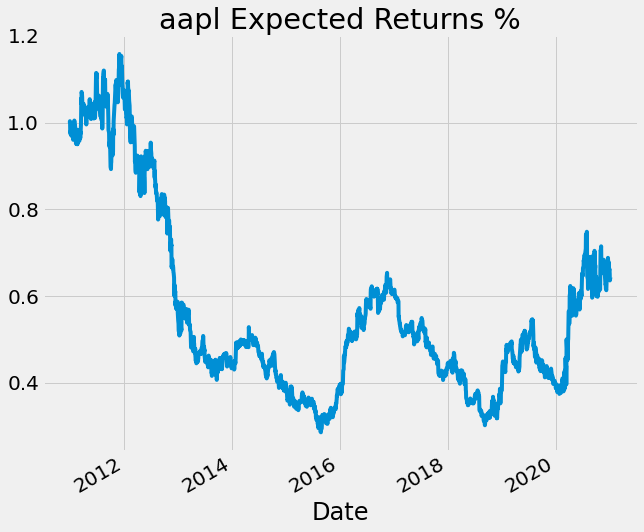

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

3.5874353539057164

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

366.9779024042386

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results